In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from nltk.tokenize import word_tokenize
import urllib.request
import matplotlib.pyplot as plt
import scipy.optimize as opt

In [2]:
text_url = r'http://www.gutenberg.org/files/74/74-0.txt'
data =  urllib.request.urlopen(text_url).read()

## Dictonary to store the word count
word_dict = {}

In [3]:
## Data variable encoding changed from bytes to string
data = data.decode('utf-8')

## Splitting the corpus into lines for tokenization
data = data.split('\r\n')

In [4]:
## There was some redundant text and hence the below operation is used 
## to remove the meta data of the corpus
data = data[data.index('THE ADVENTURES OF TOM SAWYER'):data.index('*** END OF THIS PROJECT GUTENBERG EBOOK TOM SAWYER ***')]

In [5]:
token_size=[]
vocabulary =[]
tokens = 0
## Types will act as keys of the dictionary
for i,conter in zip(data,range(len(data))):
    if len(i) <1:
        pass
    else:
        sentence = word_tokenize(i)
        for j in sentence:
            if j in word_dict:
                word_dict[j] +=1
            else:
                word_dict[j] =1
        tokens += len(sentence)
        vocabulary.append(len(word_dict.keys()))
        token_size.append(tokens)
        

        

In [6]:
## Below operation will give the total tokens
sum =0
for i in word_dict:
    sum += word_dict[i]

In [7]:
print('-----------------------------')
print('| Types |  Tokens  |  TTR   |') 
print('|  {0} |   {1}  | {2:0.4f} |'.format(len(word_dict),sum,len(word_dict)/sum))
print('-----------------------------')


-----------------------------
| Types |  Tokens  |  TTR   |
|  8421 |   88673  | 0.0950 |
-----------------------------


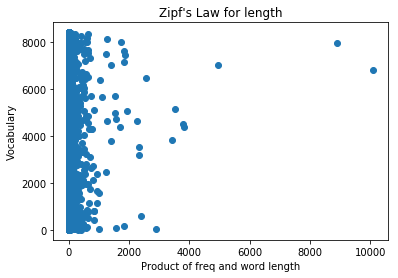

The Outliers are generally the most frequtely occuring word
Examles of them are
Word: of -- Freq: 1455
Word: for -- Freq: 522
Word: in -- Freq: 914
Word: Tom -- Freq: 805
Word: his -- Freq: 777
Word: you -- Freq: 780
Word: to -- Freq: 1718
Word: that -- Freq: 960
Word: 's -- Freq: 861
Word: . -- Freq: 3802
Word: it -- Freq: 1129
Word: had -- Freq: 527
Word: “ -- Freq: 1534
Word: n't -- Freq: 649
Word: was -- Freq: 1174
Word: ” -- Freq: 1527
Word: with -- Freq: 644
Word: the -- Freq: 3361
Word: , -- Freq: 4938
Word: he -- Freq: 924
Word: -- -- Freq: 929
Word: they -- Freq: 460
Word: and -- Freq: 2966
Word: a -- Freq: 1751


In [8]:
## To print the outliers
prod = []
outliers = []
for i in word_dict:
    if word_dict[i] ==1:
        pass
    prod.append(word_dict[i]*len(i))
    if word_dict[i]*len(i) > 1500:
        outliers.append(i)


## Plot for Zipf's law for Length.
## It should be a perfect straight line for zipfs law for length vs freq to be valid
plt.scatter(prod,range(len(prod)))
plt.title("Zipf's Law for length")
plt.xlabel('Product of freq and word length')
plt.ylabel('Vocabulary')
plt.show()

print('The Outliers are generally the most frequtely occuring word')
print('Examles of them are')
for i in outliers:
    print('Word: {0} -- Freq: {1}'.format(i,word_dict[i]))

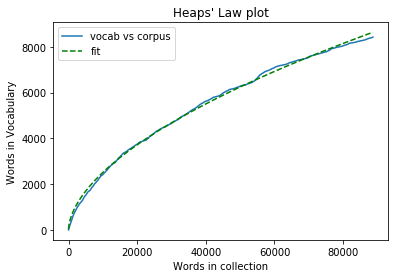

In [9]:
## Function created for Heaps' Law
def func(x,k,b):
    return k*(x**b)

## Curve Fitting to get the values of K and beta
popt, pcov = opt.curve_fit(func, token_size, vocabulary, bounds=(0.4,[100, 0.6]))
plt.plot(token_size,vocabulary,label = 'vocab vs corpus')
plt.plot(token_size, func(token_size, *popt), 'g--', label='fit')
plt.title("Heaps' Law plot")
plt.xlabel('Words in collection')
plt.ylabel('Words in Vocabulary')
plt.legend()
plt.show()

In [10]:
print ('Heaps law for this corpus:',end='')
print (' {0:0.3f}*(N^{1:0.3f})'.format(popt[0],popt[1]))

Heaps law for this corpus: 13.806*(N^0.565)
